# Lista 6

In [17]:
import numpy as np
import matplotlib.pyplot as plt

### Questão 1

In [18]:
def encontra_funcao(k, x, y):
    M = np.vander(x,increasing=True)
    a = np.linalg.solve(M,y)
    return a

In [19]:
def int_pol_partes (k, x, y):
    num_funcoes = int((len(x)-1)/k)

    matriz_coeficientes = []

    for i in range(0, len(x)-1, k):
        matriz_coeficientes.append(encontra_funcao(k, x[i:i+k+1], y[i:i+k+1]))
    
    return matriz_coeficientes

In [20]:
def p1(coefs, x):
    return coefs[0] + coefs[1]*x + coefs[2]*x*x

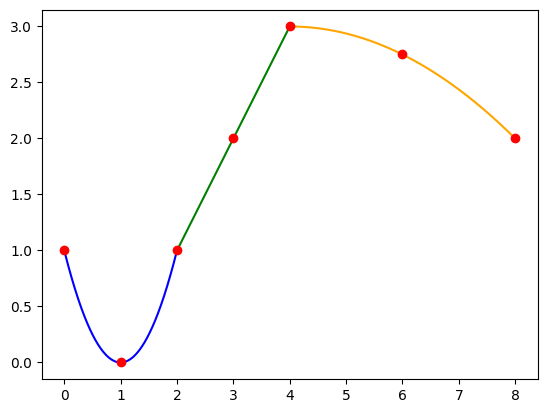

In [21]:
x=np.array([0,1,2,3,4,6,8])
y=np.array([1,0,1,2,3,2.75,2])
k = 2

A = int_pol_partes(k, x, y)

dom1 = np.linspace(0,2,1000)
dom2 = np.linspace(2,4,1000)
dom3 = np.linspace(4,8,1000)
im1  = np.array([p1(A[0], t) for t in dom1])
im2  = np.array([p1(A[1], t) for t in dom2])
im3  = np.array([p1(A[2], t) for t in dom3])

plt.plot(dom1,im1,'b')
plt.plot(dom2,im2,'g')
plt.plot(dom3,im3,'orange')
plt.plot(x,y,'ro')
plt.show()

### Questão 2

$y = a_0 + \frac {a_1} {x} + \frac {a_2} {x^2}$

Sabendo que temos três pontos $(x_0, y_0)$, $(x_1, y_1)$ e $(x_2, y_2)$. Logo podemos montar o seguite sistema:

$$\begin{cases}
y_0 = a_0 + \frac {a_1} {x_0} + \frac {a_2} {x_0^2}\\
y_1 = a_0 + \frac {a_1} {x_1} + \frac {a_2} {x_1^2}\\
y_2 = a_0 + \frac {a_1} {x_2} + \frac {a_2} {x_2^2}
\end{cases}$$

Sabendo disso e sabendo também que podemos organizar o sistema da seguinte maneira:

$\begin{bmatrix}
1& \frac {1} {x_0}&\frac {1} {x_0^2}\\
1& \frac {1} {x_1}&\frac {1} {x_1^2}\\
1& \frac {1} {x_2}&\frac {1} {x_2^2}
\end{bmatrix}$ $\begin{bmatrix}
a_0\\
a_1\\
a_2
\end{bmatrix}$ = $\begin{bmatrix}
y_0\\
y_1\\
y_2
\end{bmatrix}$

Logo, podemos solucionar o problema resolvendo esse sistema. Para facilitar, será utilizado a ferramenta `linalg.solve()` da biblioteca numpy.

In [22]:
def interpolacao_reciprocas(x, y):
    n = len(x)

    # Criando a matriz dos x's
    X = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            X[i, j] = 1/(x[i]**(j))

    b = y.copy()

    coefs = np.linalg.solve(X, b)

    return(coefs)

In [23]:
def p2(coefs, x):
    return coefs[0] + coefs[1]/x + coefs[2]/(x*x)

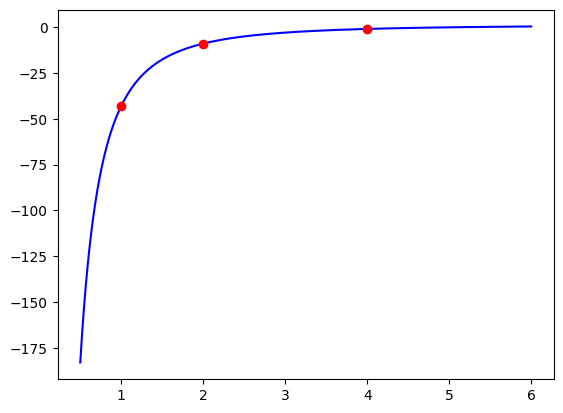

In [24]:
x = [1, 2, 4]
y = [-43, -9, -1]

coefs = interpolacao_reciprocas(x, y)

dom = np.linspace(0.5,6,1000)
im = [p2(coefs, t) for t in dom]

plt.plot(dom,im,'b')
plt.plot(x,y,'ro')
plt.show()

### Questão 3

> Sejam $x_0,x_1,\ldots,x_n$ números distintos. Um polinômio $p=p(t)$ está escrito em **forma de Newton** (com relação aos números $x_i$ anteriores) se estiver escrito como
> $$p(t) = \sum_{k=0}^n a_k N_k(t),$$
> em que $N_0(t)=1$ e $N_k(t)=\prod_{i=0}^{k-1}(t-x_i)$, para certos coeficientes $f_0,f_1,\ldots,f_n$.
>
> Essa é a forma obtida, por exemplo, pelo método de interpolação por *diferenças finitas*, que você pode encontrar na seção 3.3 do livro-texto da disciplina.
>
> Neste exercício, você implementará um análogo do algoritmo de Horner para avaliação polinomial (em forma padrão) para avaliação de polinômios em forma de Newton.
>
> A função `Newton_pol_eval( t , x , a )`, definida abaixo, recebe um número $t$ e listas $x=[x_0,\ldots,x_n]$ e $a=[a_0,\ldots,a_n]$ e retorna o valor do polinômio $p(t)$, dado em forma de Newton como acima.
>
> Defina funções `K(t,x,k)` e `L(a,k)` que façam com que a função `Newton_pol_eval(t,x,a)` possua o comportamento desejado.

Querido, professor! Nesta questão eu não consegui entender qual o objetivo das funções `K()` e `L()`. A função `L()`, por exemplo, está retornando um valor e multiplicando a variável $p$, sobretudo, $p$ não está sendo utilizado em nenhum lugar. Isso me deixou muito confuso durante a resolução do exercício. Então, eu consultei o livro e decidi modificar a função `Newton_pol_eval()` de modo que ela retorne corretamente o valor de $p(t)$, entretanto, sem utilizar as função `K()` e `L()`.

Como forma de verificar se a função está calculando corretamente, eu utilizei um exemplo da página 140 do livro-texto da disciplina.

In [25]:
# Calcular o valor de Nk
def N(t, x, k):
    out = 1
   
    for i in range(k):
        out *= t - x[i]
    
    return out

In [26]:
def Newton_pol_eval(t,x,a):
    n=len(x)
    p = 0
    
    for k in range(n+1):
        Nk = N(t, x, k)         # Calcula o valor de N para cada k
        p += a[k] * Nk          # Calcula o valor de a_k * N_k

    return p

In [27]:
a = [0.7651977, -0.4837057, -0.1087339,
     0.0658784, 0.0018251]
x = [1, 1.3, 1.6, 1.9]

t = 1.5

p = Newton_pol_eval(t, x, a)

print("Valor esperado:    0.5118200")
print("Valor encontrado: ", p)


Valor esperado:    0.5118200
Valor encontrado:  0.5118199764


### Questão 4

> Nesta questão você implementará splines quadráticas, que são versões simplificadas das splines cúbicas.
>
> Considere um conjunto de dados $(x,y)$ de tamanho $n+1$. Denotemos os passos por $h_j=x_{j+1}-x_j$ ($j=0,\ldots,n-1$).
>
> Queremos encontrar coleções de coeficientes $a_j,b_j,c_j$ ($j=0,\ldots,n-1$) tais que a função quadrática por partes
> $$S(x)=a_j+b_j(x-x_j)+c_j(x-x_j)^2,\qquad x\in [x_j,x_{j+1}]\tag{Sp-Q}$$
>
> interpole o conjunto de dados e tenha a primeira derivada contínua. Denotemos por $S_j$ a restrição de $S$ a $[x_j,x_{j+1}]$ ($j=0,\ldots,n-1$).
>
> - Como $y_j = S(x_j) = S_j(x_j) = a_j$ para $j=0,\ldots,n-1$, então
>     $$a_j = y_j$$
>
> - Como $y_{j+1} = S(x_{j+1}) = S_j(x_{j+1})$ ($j=0,\ldots,n-1$), então
>     $$a_j + b_j h_j + c_j h_j^2 =y_{j+1}\tag{$\star$}$$
>
> - Para $j=0,\ldots,n-2$, temos que
>     $$S_j'(x_{j+1}) = S'_{j+1}(x_{j+1}),$$
>     ou seja,
>     $$b_j + 2c_j h_j = b_{j+1},$$
>     ou ainda $c_j = \dfrac{b_{j+1}-b_j}{2h_j}$. Definindo $b_n=S'(x_n)$, a equação acima continua válida para $j=n-1$.
> - Substituindo a expressão obtida para $c_j$ em $(\star)$, obtemos, para $j=0,\ldots,n-1$,
>     $$a_j + b_j h_j + \dfrac{b_{j+1}-b_j}{2}h_j = y_{j+1},$$
>     ou seja,
>     $$b_j+b_{j+1} = 2\dfrac{y_{j+1}-y_j}{h_j}$$
>     para $j=0,\ldots,n-2$. 
>
> O sistema linear acima em forma matricial é
> $$\begin{bmatrix}1 & 1 &   &        &        &   &   \\& 1 & 1 &        &        &   &   \\&   & 1 & 1      &        &   &   \\&   &   & \ddots & \ddots &   &   \\&   &   &        & 1      & 1 &   \\&   &   &        &        & 1 & 1 \end{bmatrix}\begin{bmatrix}b_0\\b_1\\\vdots\\b_{n-1}\\b_n\end{bmatrix}=\begin{bmatrix}2\dfrac{y_1-y_0}{h_0}\\2\dfrac{y_2-y_1}{h_1}\\\vdots\\2\dfrac{y_n-y_{n-1}}{h_{n-1}}\end{bmatrix}$$
>
> Esse é um sistema linear com $n$ equações em $n+1$ incógnitas, e portanto possui solução não-trivial. Adicionando mais alguma equação (e.g. especificando um valor para algum $b_j$), o sistema pode ser resolvido unicamente (similarmente a como podemos especificar duas condições adicionais para definir splines cúbicas).
>
> Crie duas funções:
> 1. `spline_quad_l(x,y,b0)`: Recebe o conjunto de dados $(x,y)$ e um valor $b_0$ e retorna uma matriz $A=\begin{bmatrix}a_0&b_0&c_0\\ a_1&b_1&c_1\\ a_2&b_2&c_2\\\vdots&\vdots&\vdots\\a_{n-1}&b_{n-1}&c_{n-1}\end{bmatrix}$ com os coeficientes da spline quadrática (conforme a Equação (Sp-Q) acima) que satisfaça $S'(x_0)=b_0$.
> 2. `spline_quad_r(x,y,bn)`: Recebe o conjunto de dados $(x,y)$ e um valor $b_n$ e retorna uma matriz $A=\begin{bmatrix}a_0&b_0&c_0\\a_1&b_1&c_1\\a_2&b_2&c_2\\\vdots&\vdots&\vdots\\a_{n-1}&b_{n-1}&c_{n-1}\end{bmatrix}$ com os coeficientes da spline quadrática (conforme a Equação (Sp-Q) acima) que satisfaça $S'(x_n)=b_n$.

Querido, professor! Para solucionar esse exercício, vou utilizar esse material (https://docs.google.com/viewer?a=v&pid=sites&srcid=ZGVmYXVsdGRvbWFpbnxnbGFkeXNjam1ldG51bXxneDo0MjVlNTk2ZGFlZTU3YmNj) como referência pois ficou mais claro a forma de resolução com o exemplo de resolução.

O exemplo utilizado foi retirado de lá.

#### Item a):

$\begin{bmatrix}
a_0&b_0&c_0\\ 
a_1&b_1&c_1\\ 
a_2&b_2&c_2\\
\vdots&\vdots&\vdots\\
a_{n-1}&b_{n-1}&c_{n-1}
\end{bmatrix}$ 
$
\begin{bmatrix}
1\\ 
(x-x_k)\\ 
(x-x_k)^2\\
\end{bmatrix}
$ = 
$\begin{bmatrix}
y_0\\ 
y_1\\ 
y_2\\
\vdots\\
y_{n-1}
\end{bmatrix}$, sendo $k\in [0,n-1]$

In [28]:
def spline_quad_l(x,y,b0):

    tam_x = len(x)

    # Criando a matriz dos coeficientes a, b e c
    a, b, c = np.zeros(tam_x), np.zeros(tam_x), np.zeros(tam_x)

    # Quando x = x_k, implica em a_k = y_k
    for i in range(tam_x):
        a[i] = y[i]
    
    # Definindo b_0
    b[0] = b0


    # Calculando c_0, premissa: 
    # y_1 = a_0 + b_0(x_1 - x_0) + c_0(x_1-x_0)^2 , isso emplica: 
    # c_0 = (y_1 - a_0 - b_0(x_1 - x_0)) / (x_1 - x_0)^2
    c[0] = (y[1] - a[0] - b[0]*(x[1]-x[0])) / (x[1]-x[0])**2
    

    # Bom, sabemos que, para a condição de continuidade ser mantida, a derivada da função em (x_1, y_1) 
    # de S_0 e S_1 no ponto devem ser iguais. Partindo disso, temos que:
    # (S_0)' = b_0 + 2*c_0*(x-x_0)   , além disso:
    # (S_1)' = b_1 + 2*c_1*(x-x_1)
    # Ao analisarmos no ponto (x_1, y_1), a equação (S_1)' fica apenas:
    # (S_1)' = b_1 + 0
    # Logo, concluímos que b_1 = b_0 + 2*c_0*(x_1-x_0)

    for i in range (1, tam_x):
        b[i] = b[i-1] + 2 * c[i-1] * (x[i] - x[i-1])

        try: 
            c[i] = (y[i+1] - a[i] - b[i]*(x[i+1]-x[i])) / (x[i+1]-x[i])**2
        except:
            print(f"Para calcularmos c_{i} precisamos do ponto (x_{i+1},y_{i+1})")
    
    A = []
    for i in range(tam_x):
        A.append([a[i], b[i], c[i]])
        
    return A

In [29]:
def S(coefs, x):
    return coefs[0] + coefs[1] * x + coefs[2]*x*x

Para calcularmos c_9 precisamos do ponto (x_10,y_10)


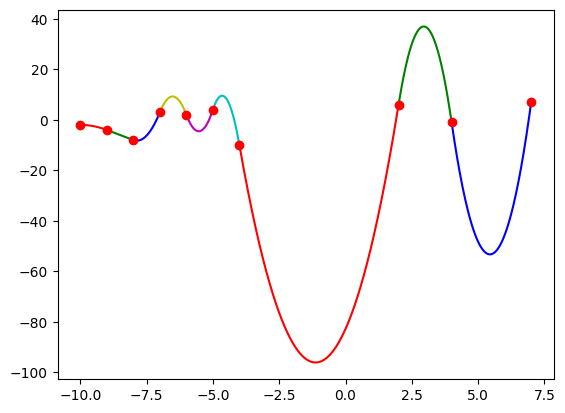

In [30]:
num_eq = 10
x = np.random.randint(-10, 10, num_eq)
y = np.random.randint(-10, 10, num_eq)
b0 = 0

# num_eq = 3
# x = [1, 3, 5]
# y = [-2, 4, 0]

# Organizando os valores de x
x.sort()
for i in range(len(x)-1):
    while x[i+1] - x[i] < 1:
        x[i+1] += 1

A = spline_quad_l(x, y, b0)
cores = ['r', 'g', 'b', 'y', 'm', 'c', 'r', 'g', 'b', 'y', 'm', 'c', 'r', 'g', 'b', 'y', 'm', 'c']

dom = []
im = []

for i in range(len(x)-1):
    dom.append(np.linspace(x[i],x[i+1],1000))
    im.append([S(A[i], t-x[i]) for t in dom[i]])
    plt.plot(dom[i], im[i],cores[i])

plt.plot(x,y,'ro')
plt.show()

Vamos calcular a matriz dos coeficientes de maneira parecida a função `spline_quad_l()`

In [31]:
def spline_quad_r(x,y,bn):
    tam_x = len(x)

    # Criando a matriz dos coeficientes a, b e c
    a, b, c = np.zeros(tam_x), np.zeros(tam_x), np.zeros(tam_x)

    # Quando x = x_k, implica em a_k = y_k
    for i in range(tam_x):
        a[i] = y[i]*1

    # Definindo b_n
    b[tam_x-1] = bn*1

    # Bom, sabemos que, para a condição de continuidade ser mantida, a derivada da função em (x_(n), y_(n)) 
    # de S_(n-1) e S_n no ponto devem ser iguais. Partindo disso, temos que:
    # (S_(n-1))' = b_(n-1) + 2*c_(n-1)*(x-x_(n-1))   , além disso:
    # (S_n)' = b_n + 2*c_n*(x-x_n)
    # Ao analisarmos no ponto (x_n, y_n), a equação (S_n)' fica apenas:
    # (S_n)' = b_n + 0
    # Logo, temos a seguinte igualdade: 
    # b_n = b_(n-1) + 2*c_(n-1)*(x_n-x_(n-1))
    # Além disso, no mesmo ponto:
    # S_(n-1) = a_(n-1) + b_(n-1)*(x_n-x_(n-1)) + c_(n-1) * (x_n-x_(n-1))^2
    # Conhecendo b_n e os valores de x e y no ponto, chegamos em duas equações:
    # b_n = b_(n-1) + 2*c_(n-1)*(x_n-x_(n-1))
    # y_n = a_(n-1) + b_(n-1) * (x_n-x_(n-1)) + c_(n-1) * (x_n-x_(n-1))^2
    # Sendo esse um sistema simples, podemos encontrar b_(n-1) e c_(n-1) da seguinte maneira    
    for n in range (tam_x-1, 0, -1):
        delta = x[n] - x[n-1]
        b[n-1] = (2*y[n] -2*a[n-1] - b[n]*delta)/(delta)
        c[n-1] = (b[n]-b[n-1])/(2*delta)
    
    # Passando a, b e c para A
    A = []
    for i in range(tam_x):
        A.append([a[i], b[i], c[i]])
        
    return A

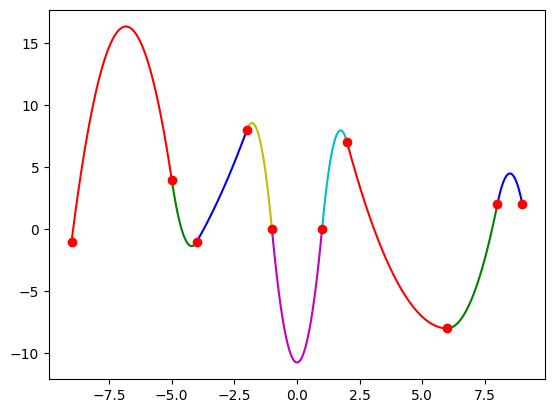

In [32]:
num_eq = 10
x = np.random.randint(-10, 10, num_eq)
y = np.random.randint(-10, 10, num_eq)

# num_eq = 3
# x = [1, 3, 5]
# y = [-2, 4, 0]

bn = -10

# Organizando os valores de x
x.sort()
for i in range(len(x)-1):
    while x[i+1] - x[i] < 1:
        x[i+1] += 1

A = spline_quad_r(x, y, bn)

dom = []
im = []
cores = ['r', 'g', 'b', 'y', 'm', 'c', 'r', 'g', 'b', 'y', 'm', 'c', 'r', 'g', 'b', 'y', 'm', 'c']

for i in range(len(x)-1):
    dom.append(np.linspace(x[i],x[i+1],1000))
    im.append([S(A[i], t-x[i]) for t in dom[i]])
    plt.plot(dom[i], im[i],cores[i])

plt.plot(x,y,'ro')
plt.show()